In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dell_xps_reviews = []

In [5]:
for i in range (1,30):
    ip=[]
    url = 'https://www.amazon.in/Dell-XPS-15-9500/product-reviews/B089HJX59L/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    dell_xps_reviews = dell_xps_reviews+ip

In [6]:
dell_xps_reviews

['\nI purchased this for more from Amazon than from Dell directly because of the next day vs 1 month arrival time difference. I was expecting the 3840x2400 4K resolution as listed in the specifications. That particular screen is also touch. Instead I received a 1920x1200 FHD+ non-touch screen. Turns out the product number listed is not for a 4k version. Beware, this listing is for the FHD+ non-touch version.The 1 star is strictly for the inaccurate product description. The laptop itself is actually beautiful with a wonderful touchpad, great speakers, good keyboard, and a spacious screen in a small form factor - but I will be returning it and ordering the 4k version from Dell instead.\n',
 '\nIt has a very premium feel. The metal casing looks great. The keyboard feels good and the trackpad is huge and easy and natural to use. There is really no competition. At just over 4 lbs, this would have been the lightest 15" laptop in the world just a decade ago, but now my wife found it "heavy" a

In [7]:
rev_string = ' '.join(dell_xps_reviews)

In [8]:
rev_string = re.sub("[^A-Za-z" "]+"," ",rev_string).lower()

In [9]:
rev_string

' i purchased this for more from amazon than from dell directly because of the next day vs month arrival time difference i was expecting the x k resolution as listed in the specifications that particular screen is also touch instead i received a x fhd non touch screen turns out the product number listed is not for a k version beware this listing is for the fhd non touch version the star is strictly for the inaccurate product description the laptop itself is actually beautiful with a wonderful touchpad great speakers good keyboard and a spacious screen in a small form factor but i will be returning it and ordering the k version from dell instead it has a very premium feel the metal casing looks great the keyboard feels good and the trackpad is huge and easy and natural to use there is really no competition at just over lbs this would have been the lightest laptop in the world just a decade ago but now my wife found it heavy and went with a surface laptop instead much to my chagrin this 

In [10]:
rev_words = rev_string.split(" ")

In [11]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [12]:
rev_words = [i for i in rev_words if not i in stopwords]

In [13]:
rev_string = ' '.join(rev_words)

In [14]:
from nltk import tokenize
reviews = tokenize.sent_tokenize(''.join(dell_xps_reviews))

In [15]:
reviews[3:10]

['Instead I received a 1920x1200 FHD+ non-touch screen.',
 'Turns out the product number listed is not for a 4k version.',
 'Beware, this listing is for the FHD+ non-touch version.The 1 star is strictly for the inaccurate product description.',
 'The laptop itself is actually beautiful with a wonderful touchpad, great speakers, good keyboard, and a spacious screen in a small form factor - but I will be returning it and ordering the 4k version from Dell instead.',
 'It has a very premium feel.',
 'The metal casing looks great.',
 'The keyboard feels good and the trackpad is huge and easy and natural to use.']

In [16]:
!pip install wordcloud

In [17]:
from wordcloud import WordCloud

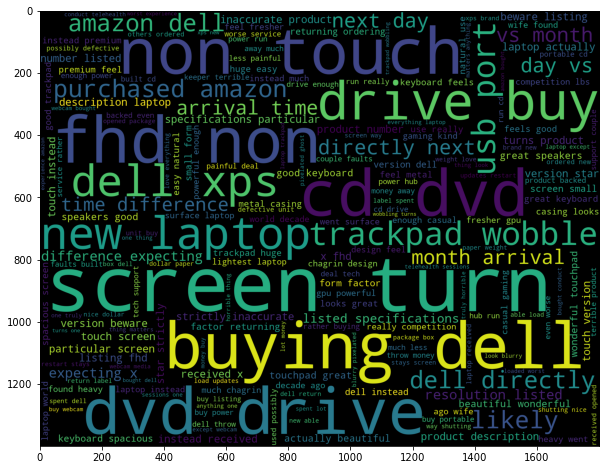

In [18]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(rev_string)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud_ip)
plt.show()

In [19]:
sent_df = pd.DataFrame(reviews,columns=['sentance'])
sent_df

,sentance
0,\nI purchased this for more from Amazon than f...
1,I was expecting the 3840x2400 4K resolution as...
2,That particular screen is also touch.
3,Instead I received a 1920x1200 FHD+ non-touch ...
4,Turns out the product number listed is not for...
...,...
1035,"For example, pretty much all USB receivers for..."
1036,"Because of the trackpad issues, the one USB-A ..."
1037,I had to buy my own dongle that's really irrit...
1038,I wanted it to last me at least 5 years and I'...


In [20]:
afinn = pd.read_csv("Afinn.csv", encoding='unicode_escape')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [21]:
afinn.shape

(2477, 2)

In [22]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [27]:
!pip3 install en_core_web_sm
!python -m spacy download en

ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)
ERROR: No matching distribution found for en_core_web_sm


2022-07-10 10:28:30.187537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-10 10:28:30.187609: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.



[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [28]:
import spacy

In [29]:
nlp = spacy.load('en_core_web_sm')
sentiment = affinity_scores

def sentiment_cal(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment.get(word.lemma_, 0)
    return sent_score

In [30]:
sentiment_cal('i am excited')

3

In [31]:
sent_df['sentimental_value']=sent_df['sentance'].apply(sentiment_cal)

In [32]:
sent_df

,sentance,sentimental_value
0,\nI purchased this for more from Amazon than f...,0
1,I was expecting the 3840x2400 4K resolution as...,0
2,That particular screen is also touch.,0
3,Instead I received a 1920x1200 FHD+ non-touch ...,0
4,Turns out the product number listed is not for...,0
...,...,...
1035,"For example, pretty much all USB receivers for...",1
1036,"Because of the trackpad issues, the one USB-A ...",0
1037,I had to buy my own dongle that's really irrit...,-3
1038,I wanted it to last me at least 5 years and I'...,1


In [33]:
sent_df['word_count'] = sent_df['sentance'].str.split().apply(len)

In [34]:
sent_df

,sentance,sentimental_value,word_count
0,\nI purchased this for more from Amazon than f...,0,22
1,I was expecting the 3840x2400 4K resolution as...,0,12
2,That particular screen is also touch.,0,6
3,Instead I received a 1920x1200 FHD+ non-touch ...,0,8
4,Turns out the product number listed is not for...,0,12
...,...,...,...
1035,"For example, pretty much all USB receivers for...",1,15
1036,"Because of the trackpad issues, the one USB-A ...",0,21
1037,I had to buy my own dongle that's really irrit...,-3,24
1038,I wanted it to last me at least 5 years and I'...,1,23


In [35]:
sent_df[sent_df['sentimental_value']>=0]

,sentance,sentimental_value,word_count
0,\nI purchased this for more from Amazon than f...,0,22
1,I was expecting the 3840x2400 4K resolution as...,0,12
2,That particular screen is also touch.,0,6
3,Instead I received a 1920x1200 FHD+ non-touch ...,0,8
4,Turns out the product number listed is not for...,0,12
...,...,...,...
1033,You have to turn off the screen and turn it ba...,0,13
1035,"For example, pretty much all USB receivers for...",1,15
1036,"Because of the trackpad issues, the one USB-A ...",0,21
1038,I wanted it to last me at least 5 years and I'...,1,23


In [36]:
sent_df[sent_df['sentimental_value']<0]

,sentance,sentimental_value,word_count
10,There is really no competition.,-1,5
11,"At just over 4 lbs, this would have been the l...",-2,40
13,Terrible product backed by even worse service....,-6,16
24,No way of shutting it off.,-1,6
28,I bought this to conduct telehealth sessions a...,-2,24
...,...,...,...
1027,I now know that there are multiple extremely d...,-2,27
1029,"When I first got the computer I thought, this ...",-2,15
1031,By a month later it was driving me insane.2) C...,-1,19
1034,If you don't catch that it's on (easy because ...,-2,119


C:\Users\89bal\anaconda3.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


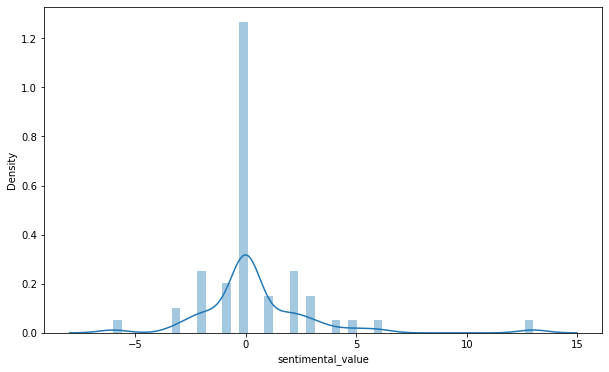

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.distplot(sent_df['sentimental_value'])
plt.show()